In [9]:
# 라이브러리 추가
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/KoPubDotumBold.ttf").get_name()
rc('font', family=font_name, size=20)

# 플롯 기본 설정
plt.rcParams["figure.figsize"] = (24,12) # 플롯 크기
plt.rcParams["lines.linewidth"] = True        # 선 두께
plt.rcParams["lines.color"] = 'r'        # 선 색상
plt.rcParams["axes.grid"] = True        # 격자 표시

In [10]:
# 코엔엘파이 추가
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [11]:
# 엑셀파일 읽고 일부 컬럼만 텍스트파일로 저장
data = pd.read_excel('D:/GEODATA/naverblog.xlsx', sheet_name='Sheet1')
data = data[['title', 'description']].to_csv('D:/GEODATA/naverblog.txt', index=False, header=False)

In [12]:
# 텍스트파일 읽기
f = open("D:/GEODATA/naverblog.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

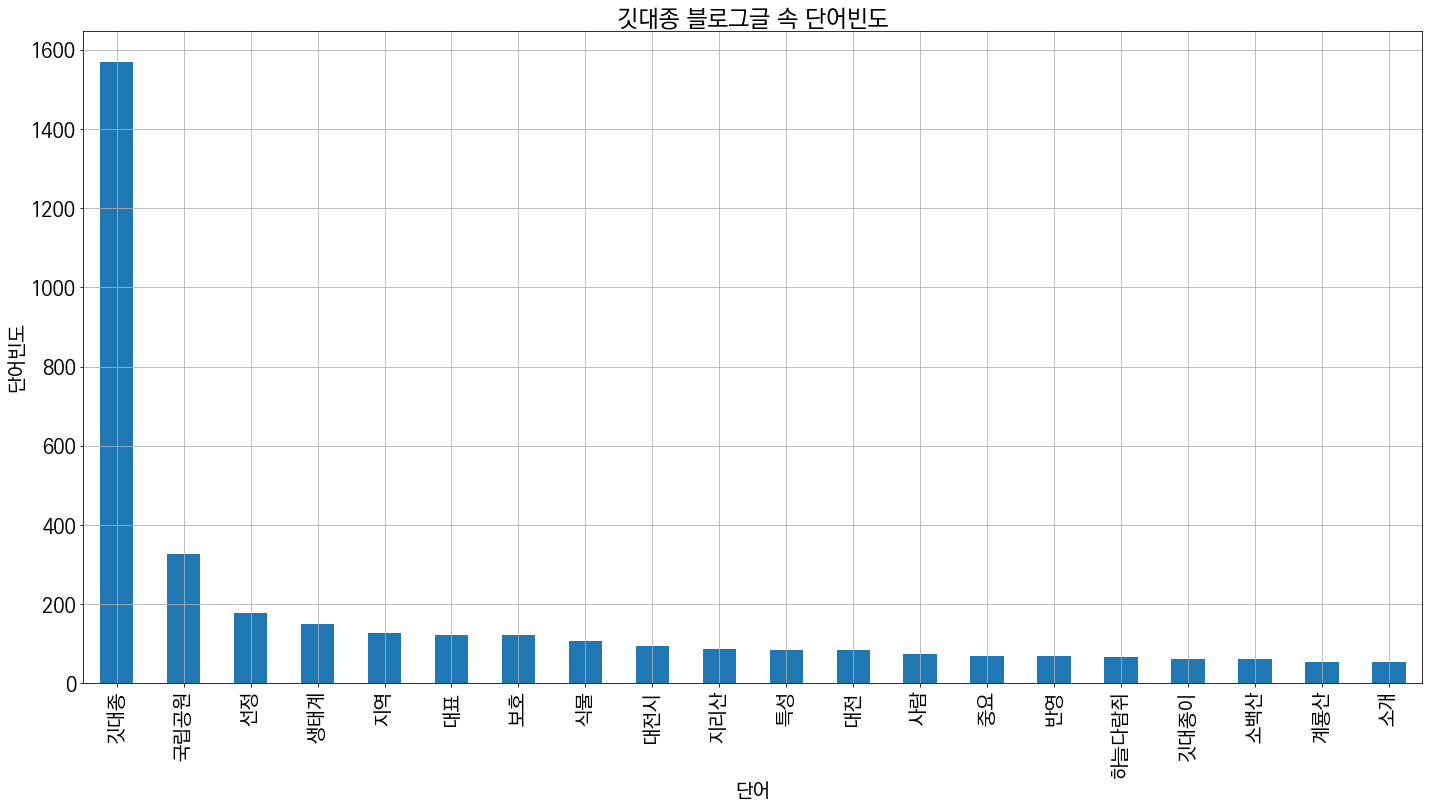

In [13]:
# 단어목록 추출
word = []
for i in range(len(lines)):
    word.append(hannanum.nouns(lines[i]))
    
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list = flatten(word)
word_list = pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(20).plot(kind='bar')
plt.xlabel('단어')
plt.ylabel('단어빈도')
plt.title('깃대종 블로그글 속 단어빈도')
plt.savefig('D:/GEODATA/NAVERAPI2_IMG01.png', bbox_inches='tight')
plt.show()

In [14]:
print(word_list.value_counts().head(20))

깃대종      1569
국립공원      326
선정        177
생태계       149
지역        128
대표        123
보호        123
식물        106
대전시        94
지리산        87
특성         83
대전         83
사람         73
중요         70
반영         68
하늘다람쥐      67
깃대종이       62
소백산        61
계룡산        55
소개         55
dtype: int64


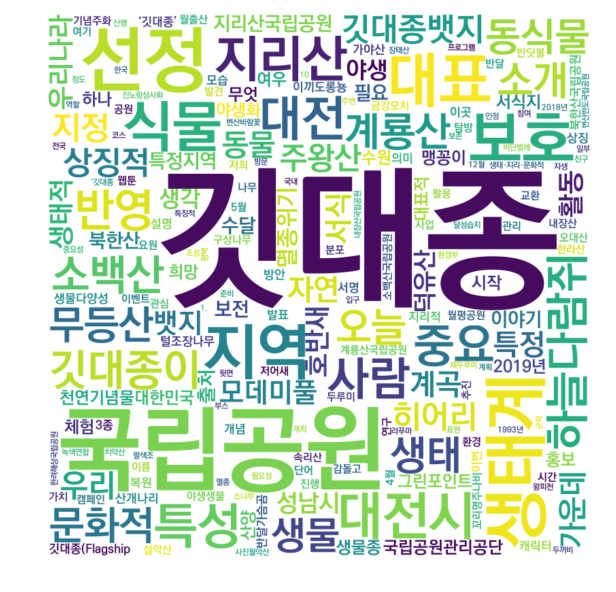

In [15]:
#워드클라우드 생성
from wordcloud import WordCloud
from collections import Counter

font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/NAVERAPI2_IMG02.png', bbox_inches='tight')
plt.show()

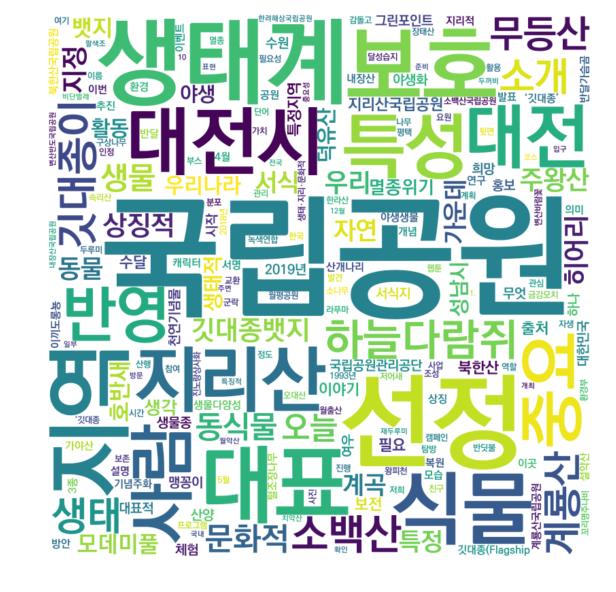

In [16]:
# 제외어 설정
count.pop("깃대종")
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/NAVERAPI2_IMG03.png', bbox_inches='tight')
plt.show()